# **Disciplina CAT010** - Aplicações dos Satélites em Ciências Atmosféricas


---

## **Aula Prática 3 - Parte 1:** $\underline{Plotando\ Precipitação\ do\ Produto\ MERGE}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como trabalhar com dados de precipitação estimado por satélite. Para isto usaremos os dados do produto MERGE disponibilizado pelo [CPTEC-INPE](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/). Mais informações sobre o **MERGE** são encontradas no [site](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/READ_ME-MERGE.pdf) do FTP do CPTEC.

---


**DADOS DE ENTRADA**: Arquivos de precipitação.

1. $\underline{Dados\ horários}$:
- **Tipo do dado:** matriz de 701 linhas x 701 colunas
- **Formato do dado:** arquivo grib
- **Nome do arquivo:** MERGE_CPTEC_2022090100.grib2
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/HOURLY/)

    ----------

2. $\underline{Dados\ diários}$:
- **Tipo do dado:** matriz de 701 linhas x 701 colunas
- **Formato do dado:** arquivo grib
- **Nome do arquivo:** MERGE_CPTEC_20220801.grib2
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/)

    ----------

3. $\underline{Dados\ mensais}$:
- **Tipo do dado:** matriz de 691 linhas x 474 colunas
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** MERGE_CPTEC_acum_apr_2004.nc
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/)


---

**DADOS DE SAÍDA:**
- **Tipo do dado:** Figura
- **Formato do dado:** arquivos PNG
- **Imagens geradas:**
    1. Fig_1_MERGE_horaria_20210101_1700.png
    2. Fig_2a_MERGE_diaria_max_med_acu_20210901_20210910.png
    3. Fig_2b_MERGE_diaria_acu_20210901_20210910.png
    4. Fig_3_MERGE_mensal_2021dec.png
    5. Fig_4a_MERGE_por_ano.png
    6. Fig_4b_MERGE_por_ano.png
    7. Fig_5_MERGE_media_anual.png
    8. Fig_6_MERGE_media_sazonal.png
    9. Fig_7_MERGE_media_mensal.png




---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Monta o google drive
3.   Define o caminho do google drive
4.   Importação das bibliotecas
5.   Download dos shapefiles
6.   Precipitação por hora
7.   Precipitação por dia
8.   Precipitação por mês
9.   Climatologia


---
**OBSERVAÇÕES IMPORTANTES**:
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive

---
- **Realizado por:** Enrique V. Mattos - 01/09/2022
- **Atualizado por:** Enrique V. Mattos - 16/10/2024


---


# **1° Passo:** Instalando as bibliotecas
- Este passo demora aproximadamente 3 min.

In [ ]:
# Instalando o proplot
!pip install -q proplot

# Instalando o cartopy
!pip uninstall -q shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy

- Chegando aqui, será necessário fazer a `Reinicialização do Ambiente de Execução`. Para isto, você deverá acessar `Ambiente de execução`, localizado na barra de ferramentas e clicar em `Reiniciar Sessão`. Como indicado na imagem abaixo.

- Em seguida você deverá rodar novamente a célula anterior de instalações, de forma que as bibliotecas sejam instaladas novamente.

- Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab. Então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual da nossa aula prática.

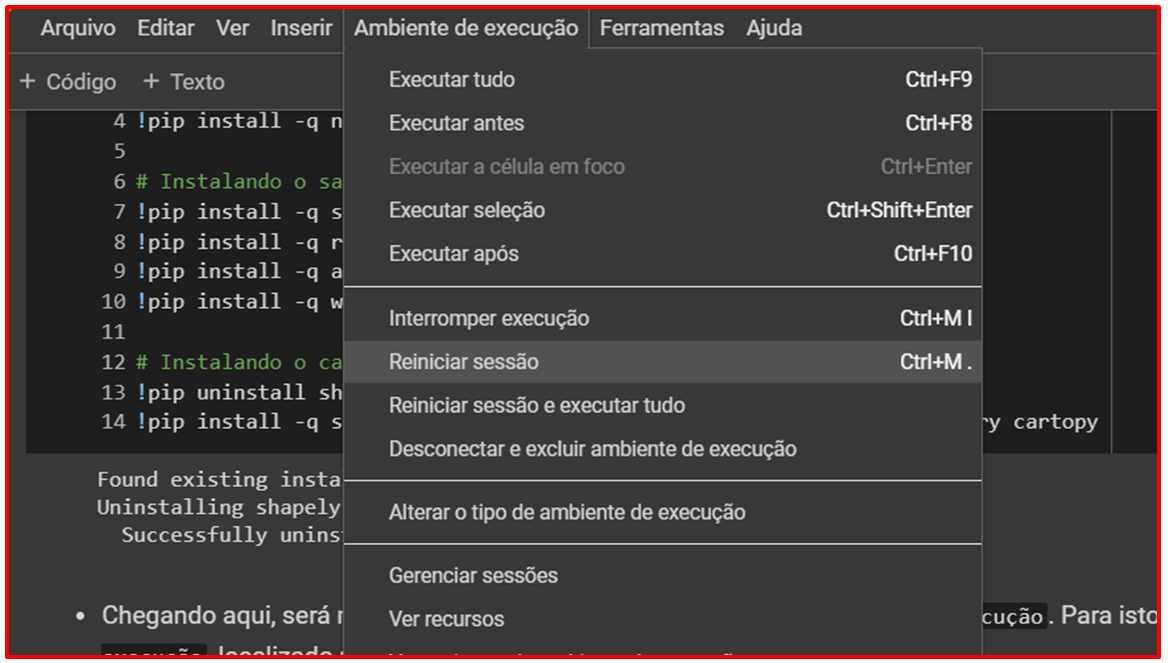

In [ ]:
# Instalando a Pygrib e Salem
!pip install -q pygrib rasterio pyproj geopandas salem descartes

# **2° Passo:** Montando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **3° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**

- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [ ]:
# nome do diretório
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_03_PLOTA_PRECIPITACAO/'

- Criando a pasta de saída ("output")

In [ ]:
# cria a pasta de saída com o nome "output"
import os
os.makedirs(f'{dir}output/', exist_ok=True)

# **4° Passo:** Importando as bibliotecas

In [ ]:
# importando as bibliotecas
import pygrib
import numpy as np
import pandas as pd
import proplot as pplt
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import scipy.ndimage
import matplotlib
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import os
import xarray as xr
import glob
import salem
import calendar
import time

# vamos ignorar avisos no código
import warnings
warnings.filterwarnings("ignore")

# **PARTE 0)**: Definindo a paleta de cores para as figuras

**cria paleta de cores**

In [ ]:
# define as 24 cores da paleta
colors = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2", "#0fa00f",
          "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa", "#ffe978", "#ffc13c",
          "#ffa200", "#ff6200", "#ff3300", "#ff1500", "#c00100", "#a50200", "#870000",
          "#653b32"]

# carrega a paleta de cores através do cmap
cmap = matplotlib.colors.ListedColormap(colors)

# seta a cor para valores acima do valor máximo
cmap.set_over('#000000')

# seta a cor para valores abaixo do valor mínimo
#cmap.set_under('#aaaaaa')
cmap.set_under('white')

# **PARTE 1)**: Precipitação por `HORA`

- **Definindo o caminho do FTP onde estão os dados por `hora`**

In [ ]:
ftp = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/HOURLY/'

- **Definindo a data e nome do arquivo**

In [ ]:
ano, mes, dia, hor = '2024', '04', '30', '14'

In [ ]:
file = f'{ftp}{ano}/{mes}/{dia}/MERGE_CPTEC_{ano}{mes}{dia}{hor}.grib2'
file

- **Baixando o dado**

In [ ]:
!wget {file}

- **Lendo o dado**

In [ ]:
# Lendo o arquivo
grib = pygrib.open(f'/content/MERGE_CPTEC_{ano}{mes}{dia}{hor}.grib2')

# Selecionando o campo de precipitação
grb = grib.select(name='Precipitation')[0]

In [ ]:
grb

In [ ]:
# Seleciona a área
lonmin = -78.0
lonmax = -30.0
latmin = -40.0
latmax =  12.0

# Selecina a extensão da imagem [min. lon, min. lat, max. lon, max. lat]
extent = [lonmin, latmin, lonmax, latmax]

# Extrai os dados para uma área específica
precip, lats, lons = grb.data(lat1=extent[1], lat2=extent[3], lon1=extent[0]+360, lon2=extent[2]+360)

In [ ]:
# mostrando o a precipitação
precip

In [ ]:
# mostrando as latitudes
lats

In [ ]:
# mostrando as longitudes
lons

- **Plota a figura**

In [ ]:
%%time
# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(8.4,8.7), tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=10, lonlines=10,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax),
          title=f'{ano}{mes}{dia} às {hor}:00 UTC',
          small='20px', large='25px')
ax.text(lonmax-12, latmin+0.5, f'Fonte:MERGE/Pixel:10km', color='black', fontsize=10)

# plota a figura
map1 = ax.contourf(lons, lats, precip, cmap=cmap, levels=pplt.arange(0.01, 80, 5), extend='max')

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='mm/h', ticks=5, ticklabelsize=15, labelsize=17, space=0.5, length=0.919)

# salva figura
fig.save(f'{dir}output/Fig_1_MERGE_horaria_{ano}{mes}{dia}_{hor}00.png', bbox_inches='tight', pad_inches=0, dpi=300)

# exibe a figura na tela
pplt.show()

# **PARTE 2)**: Precipitação por `DIA`

## - **Definindo o período dos dados**

In [ ]:
# ano, mes e dia INICIAL do período
anoi = 2024
mesi = 4
diai = 28

# ano, mes e dia FINAL do período
anof = 2024
mesf = 5
diaf = 2

# FTP dos dados por dia
ftp = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/'

## - **Baixando os dados**

In [ ]:
%%time

# Data desejada
date_in = datetime(anoi, mesi, diai)
date_ini = date_in.strftime('%Y%m%d')

date_en = datetime(anof, mesf, diaf)
date_end = date_en.strftime('%Y%m%d')

# Número de dias
n_days = date_en - date_in

# Download dos dados
for file in pd.date_range(date_ini, date_end, freq='d'):

    # extrai ano e mes
    ano = file.strftime('%Y')
    mes = file.strftime('%m')
    dia = file.strftime('%d')

    # nome do arquivo
    filename = f'MERGE_CPTEC_{ano}{mes}{dia}.grib2'

    # ftp + filename. Exemplo: http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/09/MERGE_CPTEC_20230920.grib2
    ftp_filename = f'{ftp}{ano}/{mes.zfill(2)}/{filename}'

    # baixando arquivo diário de chuva
    !wget {ftp_filename}

    print('\n---------------------')
    print('Downloading FTP File:')
    print('---------------------')
    print('Model: MERGE')
    print('File Name: ' + ftp_filename)

## - **Calcula a chuva máxima, média e acumulada**

In [ ]:
# Loop nos arquivos diários
for dia in pd.date_range(date_ini, date_end, freq='d'):

    # Extrai no formato '2021-10-17 00:00:00' para '20211017'
    dia = dia.strftime('%Y%m%d')

    # Monta o nome do arquivo 'MERGE_CPTEC_20211001.grib2'
    file_name = f'MERGE_CPTEC_{str(dia)}.grib2'

    # Monta o caminho e nome do arquivo '/content/input/MERGE_CPTEC_20211017.grib2'
    grib = f'/content/{file_name}'

    # Se o arquivo existe
    if (os.path.exists(grib)):

        # imprimindo na tela o arquivo atual
        print('Processando arquivo:', grib)

        # Lendo o arquivo
        grib = pygrib.open(grib)

        # Lendo o campo do modelo
        grb = grib.select(name='Precipitation')[0]

        # Extrai os dados para uma área específica
        precip, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

        # Converter de 'kg m**-2 s**-1' para 'mm/h'
        #precip = precip * 60 * 60

        # Suaviza os contornos
        precip = scipy.ndimage.zoom(precip, 3)
        lons = scipy.ndimage.zoom(lons, 3)
        lats = scipy.ndimage.zoom(lats, 3)

        # Se é o primeiro ciclo, cria um array que guardará os valores médios
        if (dia == date_ini):
            precip_sum = np.zeros((precip.shape[0], precip.shape[1]))
            precip_max = np.full((precip.shape[0], precip.shape[1]), -9999)
            precip_min = np.full((precip.shape[0], precip.shape[1]),  9999)

        # Soma os valores
        precip_sum = precip_sum + precip

        # Extrai o valor máximo
        precip_max = np.maximum(precip, precip_max)

        # Extrai o valor mínimo
        precip_min = np.minimum(precip, precip_min)

# Calcula o valor médio
precip_med = precip_sum / n_days.days

In [ ]:
# colocar chuva abaixo de 1 mm/h como "Not a Number"
precip_min[precip_min < 1] = np.nan
precip_max[precip_max < 1] = np.nan
precip_med[precip_med < 1] = np.nan
precip_sum[precip_sum < 1] = np.nan

## - **Plota imagem**: Precipitação Máxima, Média e Acumulada  

In [ ]:
%%time
# Plotando a figura
fig, ax = pplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree', ncols=3, sharey=True, sharex=True)

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=10, lonlines=10,
          latlim=(latmin,latmax),
          lonlim=(lonmin,lonmax),
          abc=True, abcstyle='a)', abcsize=5,
          small='16px', large='16px')

#-------------------------------#
#        Plot 1: Máxima
#-------------------------------#
# plota mapa
map1 = ax[0].contourf(lons, lats, precip_max, cmap=cmap, levels=pplt.arange(0, 500, 20), extend='max')

# plota título de figura
ax[0].format(title=f'Máxima: {date_ini}-{date_end}')
ax[0].text(lonmax-18, latmin+0.5, f'Fonte:MERGE/Pixel:10km', color='black', fontsize=10)

# plota barra de cores
ax[0].colorbar(map1, loc='b', label='mm/dia', ticklabelsize=13, labelsize=15, space=0.4, length=0.92, orientation='horizontal')

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)

#-------------------------------#
#       Plot 2: Média
#-------------------------------#
# plota mapa
map2 = ax[1].contourf(lons, lats, precip_med, cmap=cmap, levels=pplt.arange(0, 50, 2), extend='max')

# plota título de figura
ax[1].format(title=f'Média: {date_ini}-{date_end}')
ax[1].text(lonmax-18, latmin+0.5, f'Fonte:MERGE/Pixel:10km', color='black', fontsize=10)

# plota barra de cores
ax[1].colorbar(map2, loc='b', label='mm/dia', ticklabelsize=13, labelsize=15, space=0.4, length=0.92, orientation='horizontal')

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax[1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)

#-------------------------------#
#      Plot 3: Acumulada
#-------------------------------#
# plota mapa
map3 = ax[2].contourf(lons, lats, precip_sum, cmap=cmap, levels=pplt.arange(0, 500, 50), extend='max')

# plota título de figura
ax[2].format(title=f'Acumulada: {date_ini}-{date_end}')
ax[2].text(lonmax-18, latmin+0.5, f'Fonte:MERGE/Pixel:10km', color='black', fontsize=10)

# plota barra de cores
ax[2].colorbar(map3, loc='b', label='mm/dia', ticklabelsize=13, labelsize=15, space=0.4, length=0.92, orientation='horizontal')

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax[2].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)
#-------------------------------#

# salva figura
fig.save(f'{dir}output/Fig_2a_MERGE_diaria_max_med_acu_{date_ini}_{date_end}.png', bbox_inches='tight', pad_inches=0, dpi=300)

# exibe a figura na tela
pplt.show()

## - **Plota imagem**: Precipitação Acumulada  

In [ ]:
# Plotando a figura
fig, ax = pplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=10, lonlines=10,
          latlim=(latmin,latmax),
          lonlim=(lonmin,lonmax),
          small='16px', large='16px')

# plota mapa
map1 = ax.contourf(lons,
                   lats,
                   precip_sum,
                   cmap=cmap,
                   levels=pplt.arange(0, 1000, 50),
                   extend='max')

# plota título de figura
ax.format(title=f'Acumulada: {date_ini}-{date_end}')
ax.text(lonmax-18, latmin+0.5, f'Fonte:MERGE/Pixel:10km', color='black', fontsize=10)

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='mm/dia', ticks=100, ticklabelsize=13, labelsize=15, space=-1.1, length=0.99)

# salva figura
fig.save(f'{dir}output/Fig_2b_MERGE_diaria_acu_{date_ini}_{date_end}.png', bbox_inches='tight', pad_inches=0, dpi=300)

# exibe a figura na tela
pplt.show()

# **PARTE 3)**: Precipitação por `MÊS`

- **Definindo o caminho do FTP onde estão os dados por mês**

In [ ]:
ftp = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/'

- **Definindo ano, mês e monta o nome do arquivo**

In [ ]:
ano, mes = '2024', 'apr'

In [ ]:
file = f'{ftp}MERGE_CPTEC_acum_{mes}_{ano}.nc'
file

- **Baixando o dado**: os arquivos possuem o nome que indica o mês e ano, como exemplo **MERGE_CPTEC_acum_apr_2001.nc**

In [ ]:
!wget {file}

- **Lendo o dado**

In [ ]:
ds = xr.open_dataset(f'/content/MERGE_CPTEC_acum_{mes}_{ano}.nc')

- **Visualizando o dado**

In [ ]:
# mostrando os dados
ds

In [ ]:
# plotando uma figura simples
ds['pacum'].plot()

- **Plota a figura**

In [ ]:
%%time
# cria a moldura da figura
fig, ax = pplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=10, lonlines=10,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax),
          title=f'{ano}-{mes}',
          small='16px', large='16px')
ax.text(lonmax-17, latmin+0.5, f'Fonte:MERGE/Pixel:10km', color='black', fontsize=10)

# plota a figura
map1 = ax.contourf(ds['lon'], ds['lat'], ds['pacum'][0,:,:], cmap=cmap, levels=pplt.arange(0.01, 500, 50), extend='max')

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8, zorder=2)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='mm/mês', ticks=100, ticklabelsize=13, labelsize=15, space=-1.0, length=0.99)

# salva figura
fig.save(f'{dir}output/Fig_3_MERGE_mensal_{ano}{mes}.png', bbox_inches='tight', pad_inches=0, dpi=300)

# exibe a figura na tela
pplt.show()

# **PARTE 4)**: `Climatologia`

##**- Definindo o caminho do FTP onde estão os dados climatológicos**

In [ ]:
ftp = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/'

##**- Baixa os dados mensais**

In [ ]:
# define o nome dos meses
meses = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

In [ ]:
# define o ano inicial e final
ano_inicial = 2018
ano_final = 2023

Demora 2 min para baixar os dados mensais de de 2018 a 2023.

In [ ]:
%%time
# loop dos anos e meses
for ano in range(ano_inicial, ano_final+1): # loop dos anos
    for mes in meses: # loop dos meses

        print('-------------------------------------------------------------------------------------')
        print(f'BAIXANDO ARQUIVO: {ano}-{mes}')
        print('---------------------------------------------------------------------------------- \n')

        # monta nome do arquivo
        file = f'{ftp}MERGE_CPTEC_acum_{mes}_{ano}.nc'

        # baixa arquivo
        !wget {file}

##**- Leitura dos dados**. Iremos ler os arquivos do ano todo de uma única vez, e produziremos um único conjunto de dados. Para isto usaremos mais uma vez a biblioteca [**xarray**](https://docs.xarray.dev/en/stable/) com a função [**open_mfdataset**](https://docs.xarray.dev/en/stable/generated/xarray.open_mfdataset.html).

In [ ]:
# mostrando um dos arquivos
ds = xr.open_dataset('/content/MERGE_CPTEC_acum_may_2023.nc')
ds

In [ ]:
# lista dos arquivos que foram baixados
files=[]
for i in range(ano_inicial, ano_final+1):
    files = files + glob.glob(f'/content/MERGE_CPTEC_acum*_{i}.nc')
files

In [ ]:
# quantidade de arquivos
len(files)

In [ ]:
# lendo os dados
chuva_por_mes = xr.open_mfdataset(files, concat_dim='time', combine='nested')

In [ ]:
# mostrando os dados
chuva_por_mes

In [ ]:
# mostrando os tempos
chuva_por_mes['time']

##**- Alguns gráficos básicos**

In [ ]:
chuva_por_mes

In [ ]:
# selecionando o mês pelo NOME
chuva_por_mes['pacum'].loc['2021-12-01T12:00:00.000000000'].plot()

In [ ]:
# selecionando o mês pelo ÍNDICE
chuva_por_mes['pacum'].isel(time=3).plot()

In [ ]:
# selecionando o mês pelo ÍNDICE da matriz
chuva_por_mes['pacum'][3, :, :].plot()

In [ ]:
# fazendo uma soma no tempo
chuva_por_mes['pacum'].sum(dim='time').plot()

##**- Alguns gráficos mais sofiscados e detalhados**

###**Baixando e lendo o shapefile de um determinado Estado do Brasil**

**Baixando o shapefile**

In [ ]:
# sigla do estado
sigla_estado = 'MG'

# url
url = 'https://github.com/evmpython/shapefile/raw/main/UFs/'

# caminho completo do arquivo. Exemplo: https://github.com/evmpython/shapefile/raw/main/UFs/MG/MG_UF_2019.shp
file1 = f'{url}{sigla_estado}/{sigla_estado}_UF_2019.cpg'
file2 = f'{url}{sigla_estado}/{sigla_estado}_UF_2019.dbf'
file3 = f'{url}{sigla_estado}/{sigla_estado}_UF_2019.prj'
file4 = f'{url}{sigla_estado}/{sigla_estado}_UF_2019.shp'
file5 = f'{url}{sigla_estado}/{sigla_estado}_UF_2019.shx'

# baixa o shapefile
!wget -c {file1}
!wget -c {file2}
!wget -c {file3}
!wget -c {file4}
!wget -c {file5}

**Leitura do shapefile**

In [ ]:
# leitura do shapefile com a biblioteca SALEM
shp = salem.read_shapefile(f'/content/{sigla_estado}_UF_2019.shp')

In [ ]:
# mostra o shapefile que foi lido
shp

In [ ]:
# seleciona os limites da imagem
lonmin = float(shp['min_x'])
lonmax = float(shp['max_x'])

latmin = float(shp['min_y'])
latmax = float(shp['max_y'])

print(lonmin, lonmax)
print(latmin, latmax)

###**a) Por ano**

**Gera estatísticas**

In [ ]:
# reamostra o dado
chuva_por_ano = chuva_por_mes['pacum'].groupby('time.year').sum('time')

In [ ]:
# recorta o dado para região
chuva_por_ano = chuva_por_ano.salem.roi(shape=shp)

In [ ]:
# mostra o dado
chuva_por_ano

**Plota gráfico**

In [ ]:
len(chuva_por_ano)

In [ ]:
# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(12, 17), nrows=3, ncols=2, tight=True, proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          latlines=3, lonlines=3,
          latlim=(latmin-0.10, latmax+0.10), lonlim=(lonmin-0.10, lonmax+0.10),
          suptitle=f'MERGE - Precipitação por Ano ({ano_inicial}-{ano_final})',
          abc=True, abcstyle='a)', abcsize=5,
          small='25px', large='30px')

# loop dos anos
for i in range(len(chuva_por_ano)):

  # extrai o nome do ano
  ano = str(chuva_por_ano['year'][i].values)[0:4]

  # exibe na tela o ano que esta sendo processado
  print(f'Processando o ano: .... {ano}')

  # plota figura
  map1 = ax[i].contourf(chuva_por_ano['lon'],
                        chuva_por_ano['lat'],
                        chuva_por_ano[i,:,:],
                        cmap=cmap,
                        levels=pplt.arange(0.01, 2000, 100),
                        extend='both')

  # plota titulo de cada figura
  if(i == 0): ax[i].format(title=ano, labels = [True, False, False, False])
  if(i == 2): ax[i].format(title=ano, labels = [True, False, False, False])
  if(i == 1): ax[i].format(title=ano, labels = [False, False, False, False])
  if(i == 3): ax[i].format(title=ano, labels = [False, False, False, False])
  if(i == 4): ax[i].format(title=ano, labels = [True, False, True, False])
  if(i == 5): ax[i].format(title=ano, labels = [False, False, True, False])

  # plota contorno do Estado de MG
  shapefile = list(shpreader.Reader(f'/content/{sigla_estado}_UF_2019.shp').geometries())
  ax[i].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.0)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', orientation='vertical', label='Precipitação (mm/ano)', ticks=300, ticklabelsize=20, labelsize=20, space=0.5, length=0.60, width=0.5, )

# salva figura
fig.savefig(f'{dir}output/Fig_4a_MERGE_por_ano.jpg', transparent=True, dpi=300, bbox_inches="tight", pad_inches=0.1)

Uma outra forma é **retirar** os labels dos eixos das latitudes e longitudes.

In [ ]:
# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(12, 18), nrows=3, ncols=2, tight=True, proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          latlines=3, lonlines=3,
          latlim=(latmin-0.10, latmax+0.10), lonlim=(lonmin-0.10, lonmax+0.10),
          suptitle=f'MERGE - Precipitação por Ano ({ano_inicial}-{ano_final})',
          abc=True, abcstyle='a)', abcsize=5,
          small='25px', large='30px',
          linewidth=0, grid=False)

# loop dos anos
for i in range(len(chuva_por_ano)):

  # extrai o nome do ano
  ano = str(chuva_por_ano['year'][i].values)[0:4]

  # exibe na tela o ano que esta sendo processado
  print(f'Processando o ano: .... {ano}')

  # plota figura
  map1 = ax[i].contourf(chuva_por_ano['lon'], chuva_por_ano['lat'], chuva_por_ano[i,:,:],
                        cmap=cmap,
                        levels=pplt.arange(0.01, 2000, 100),
                        extend='both')

  # plota titulo de cada figura
  if(i == 0): ax[i].format(title=ano, labels = False)
  if(i == 2): ax[i].format(title=ano, labels = False)
  if(i == 1): ax[i].format(title=ano, labels = False)
  if(i == 3): ax[i].format(title=ano, labels = False)
  if(i == 4): ax[i].format(title=ano, labels = False)
  if(i == 5): ax[i].format(title=ano, labels = False)

  # plota contorno do Estado de MG
  shp.plot(edgecolor='black', facecolor='none', linewidth=1, alpha=0.8, ax=ax[i])

# plota barra de cores da figura
fig.colorbar(map1, loc='b', label='Precipitação (mm/ano)', ticks=300, ticklabelsize=20, labelsize=20, space=0.5, length=0.60, width=0.5)

# salva figura
fig.savefig(f'{dir}output/Fig_4b_MERGE_por_ano.jpg', transparent=True, dpi=300, bbox_inches="tight", pad_inches=0.1)

###**b) Anual**

**Gera estatísticas**

In [ ]:
# reamostra o dado
chuva_media_anual = chuva_por_ano.mean(dim='year')

In [ ]:
# recorta o dado para região
chuva_media_anual = chuva_media_anual.salem.roi(shape=shp)

In [ ]:
# mostra o dado
chuva_media_anual

**Plota gráfico**

In [ ]:
# Plotando a figura
fig, ax = pplt.subplots(figsize=(8,6), tight=True, proj='pcarree')

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=True,
          latlines=3, lonlines=3,
          latlim=(latmin-0.10, latmax+0.10), lonlim=(lonmin-0.10, lonmax+0.10),
          small='25px', large='15px',
          title = f'MERGE - Precipitação Média Anual ({ano_inicial}-{ano_final})')

# plota contorno do Estado de MG
shp.plot(edgecolor='black', facecolor='none', linewidth=1, alpha=0.8, ax=ax)

# plota figura
map1 = ax.contourf(chuva_media_anual['lon'],
                   chuva_media_anual['lat'],
                   chuva_media_anual[:,:],
                   cmap='jet',
                   levels=pplt.arange(0.01, 2000, 100),
                   extend='both')

# plota barra de cores da figura
fig.colorbar(map1, loc='b', label='Precipitação (mm/ano)', ticks=300, ticklabelsize=20, labelsize=20, length=0.70)

# salva figura
fig.savefig(f'{dir}output/Fig_5_MERGE_media_anual.png', dpi=300)

###**c) Sazonal**

**Gera estatísticas**

In [ ]:
# reamostra o dado
chuva_media_sazonal = chuva_por_mes['pacum'].groupby("time.season").mean(dim="time")

In [ ]:
# recorta o dado para região
chuva_media_sazonal  = chuva_media_sazonal.salem.roi(shape=shp)

In [ ]:
# mostra o dado
chuva_media_sazonal

**Plota gráfico**

In [ ]:
# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(12,12), nrows=2, ncols=2, tight=True, proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          latlines=3, lonlines=3,
          latlim=(latmin-0.10, latmax+0.10), lonlim=(lonmin-0.10, lonmax+0.10),
          suptitle=f'MERGE - Precipitação Média Sazonal ({ano_inicial}-{ano_final})',
          abc=True, abcstyle='a)', abcsize=5,
          small='25px', large='30px')

# loop das estações
for s in range(len(chuva_media_sazonal)):

    # plota figura
    map1 = ax[s].contourf(chuva_media_sazonal['lon'],
                          chuva_media_sazonal['lat'],
                          chuva_media_sazonal[s,:,:],
                          cmap='jet', levels=pplt.arange(0.01, 300, 50),
                          extend='both')

    # plota titulo de cada figura
    if(s == 0): ax[s].format(title=chuva_media_sazonal.season[s].values, labels = [True, False, False, False])
    if(s == 1): ax[s].format(title=chuva_media_sazonal.season[s].values, labels = [False, False, False, False])
    if(s == 2): ax[s].format(title=chuva_media_sazonal.season[s].values, labels = [True, False, True, False])
    if(s == 3): ax[s].format(title=chuva_media_sazonal.season[s].values, labels = [False, False, True, False])

    # plota contorno do Estado de MG
    shapefile = list(shpreader.Reader(f'/content/{sigla_estado}_UF_2019.shp').geometries())
    ax[s].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.0)

# plota barra de cores da figura
fig.colorbar(map1, loc='b', label='Precipitação (mm/estação)', ticks=50, ticklabelsize=20, labelsize=20, space=0.5, length=0.60, width=0.5)

# salva figura
fig.savefig(f'{dir}output/Fig_6_MERGE_media_sazonal.png', dpi=300)

###**d) Mensal**

**Gera estatísticas**

In [ ]:
# reamostra o dado
chuva_media_mensal = chuva_por_mes['pacum'].groupby('time.month').mean(dim='time')

In [ ]:
# recorta o dado para região
chuva_media_mensal = chuva_media_mensal.salem.roi(shape=shp)

In [ ]:
# mostra o dado
chuva_media_mensal

**Plota gráfico**

In [ ]:
# cria a moldura da figura
fig, ax = pplt.subplots(ncols=3, nrows=4, axheight=3, tight=True, proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          latlines=3, lonlines=3,
          latlim=(latmin-0.10, latmax+0.10), lonlim=(lonmin-0.10, lonmax+0.10),
          suptitle=f'MERGE - Precipitação Média Mensal ({ano_inicial}-{ano_final})',
          abc=True, abcstyle='a)', abcsize=5,
          small='25px', large='30px')

# loop dos meses
for m in np.arange(0, 12):

    # nome do mês
    mes = str(m+1).zfill(2)

    # plota figura
    if m == 0:
        map1 = ax[m].contourf(chuva_media_mensal['lon'],
                              chuva_media_mensal['lat'],
                              chuva_media_mensal[m,:,:],
                              cmap=cmap,
                              levels=pplt.arange(0.01, 300, 50),
                              extend='both')
    else:
        ax[m].contourf(chuva_media_mensal['lon'],
                       chuva_media_mensal['lat'],
                       chuva_media_mensal[m,:,:],
                       cmap=cmap,
                       levels=pplt.arange(0.01, 300, 50),
                       extend='both')

    # plota titulo de cada figura
    if (m==1 or m==2 or m==4 or m==5 or m==7 or m==8): ax[m].format(title=calendar.month_name[int(m+1)], labels=False)
    if (m==10 or m==11): ax[m].format(title=calendar.month_name[int(m+1)], labels=[False, False, True, False])
    if (m==0 or m==3 or m==6): ax[m].format(title=calendar.month_name[int(m+1)], labels=[True, False, False, False])
    if (m==9): ax[m].format(title=calendar.month_name[int(m+1)], labels=[True, False, True, False])

    # plota contorno do Estado de MG
    shapefile = list(shpreader.Reader(f'/content/{sigla_estado}_UF_2019.shp').geometries())
    ax[m].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.0)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', orientation='vertical', label='Precipitação (mm/mês)', ticks=50, ticklabelsize=20, labelsize=20, space=0.5, length=0.60, width=0.5)

# salva figura
fig.savefig(f'{dir}output/Fig_7_MERGE_media_mensal.png', dpi=300)